# Dimension Reduction Methods

In [1]:
import os
import pickle, gzip

f = gzip.open('D:\\Python\\Machine Learning\\Unsupervised Learning using python Book 4\\datasets\\mnist.pkl.gz', 'rb')

train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

f.close()

In [2]:
X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_validation: ', X_validation.shape)
print('Shape of y_validation: ', y_validation.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)


Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [3]:
import pandas as pd

train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train) + len(X_validation))
test_index = range(len(X_train) + len(X_validation), len(X_train) + len(X_validation) + len(X_test))

X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)


In [4]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [5]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

In [6]:
y_train.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [7]:
y_train.value_counts()

1    5678
7    5175
3    5101
9    4988
2    4968
6    4951
0    4932
4    4859
8    4842
5    4506
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def view_digit(example):
    label = y_train.loc[0]
    image = X_train.loc[example, :].values.reshape([28, 28])
    plt.title('Example: %d Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('grey'))
    plt.show()

# PCA

## 1. PCA

In [9]:
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_index

range(0, 50000)

Tranform PCA

In [12]:
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [13]:
print('Variance Explained by all 784 principal components: ', sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999994


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
print(importanceOfPrincipalComponents)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:299].sum(axis=1).values)

                0
0    9.744386e-02
1    7.059849e-02
2    6.216131e-02
3    5.379486e-02
4    4.858055e-02
5    4.319612e-02
6    3.277574e-02
7    2.886384e-02
8    2.768835e-02
9    2.365928e-02
10   2.099520e-02
11   2.020406e-02
12   1.715791e-02
13   1.681795e-02
14   1.579267e-02
15   1.492753e-02
16   1.318167e-02
17   1.276553e-02
18   1.186514e-02
19   1.151021e-02
20   1.069107e-02
21   1.007500e-02
22   9.536298e-03
23   9.078618e-03
24   8.827880e-03
25   8.369509e-03
26   8.175408e-03
27   7.847960e-03
28   7.420141e-03
29   6.907059e-03
..            ...
754  3.526742e-34
755  3.526742e-34
756  3.526742e-34
757  3.526742e-34
758  3.526742e-34
759  3.526742e-34
760  3.526742e-34
761  3.526742e-34
762  3.526742e-34
763  3.526742e-34
764  3.526742e-34
765  3.526742e-34
766  3.526742e-34
767  3.526742e-34
768  3.526742e-34
769  3.526742e-34
770  3.526742e-34
771  3.526742e-34
772  3.526742e-34
773  3.526742e-34
774  3.526742e-34
775  3.526742e-34
776  3.526742e-34
777  3.526

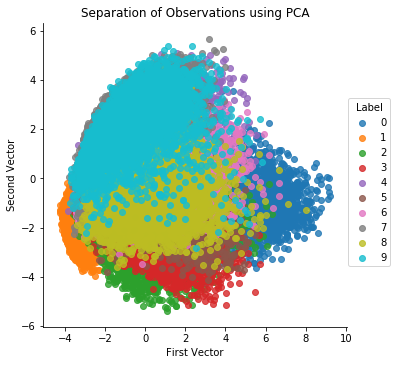

In [15]:
import seaborn as sns

def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
    tempDF = pd.concat((tempDF, yDF), axis=1, join='inner')
    tempDF.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title('Separation of Observations using '+ algoName)

scatterPlot(X_train_PCA, y_train, 'PCA')

## 2. Incremental PCA

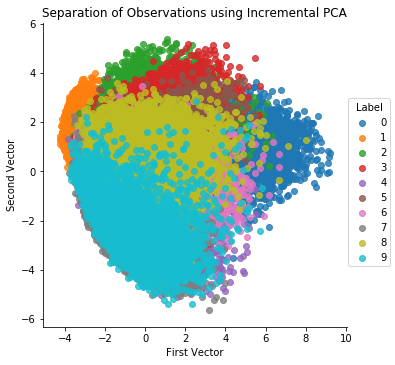

In [16]:
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, 'Incremental PCA')

Evaluate performance

In [17]:
print('Variance Explained by all 784 principal components: ', sum(incrementalPCA.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0000000000000004


## 3. Sparse PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


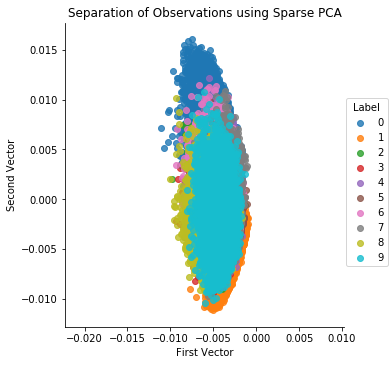

In [18]:
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000, :])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = pd.DataFrame(data=X_validation_sparsePCA, index= validation_index)

scatterPlot(X_train_sparsePCA, y_train, 'Sparse PCA')


## 4. Kernel PCA

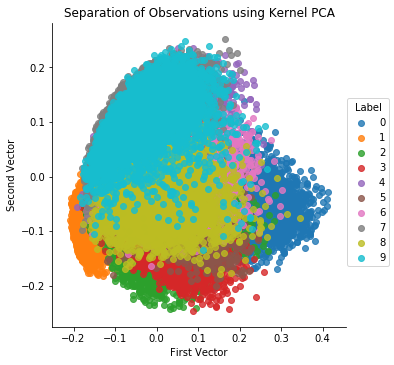

In [19]:
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000, :])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")


# Singular Value Decomposition (SVD)

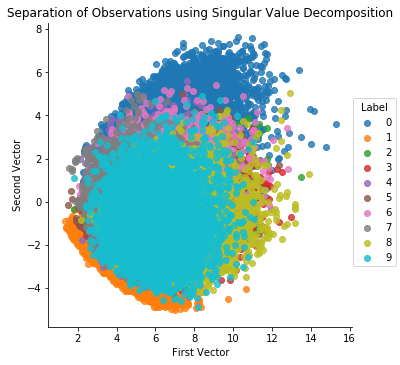

In [20]:
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, 'Singular Value Decomposition')

# Random Projection

## 1. Gaussian Random Projection

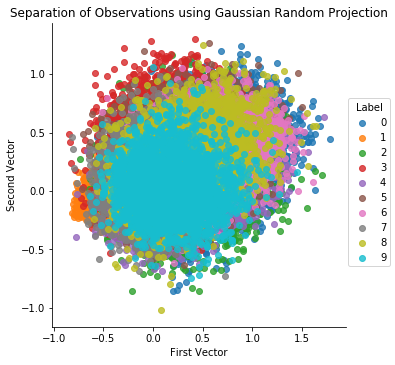

In [21]:
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, 'Gaussian Random Projection')


## 2. Sparse Random Projection

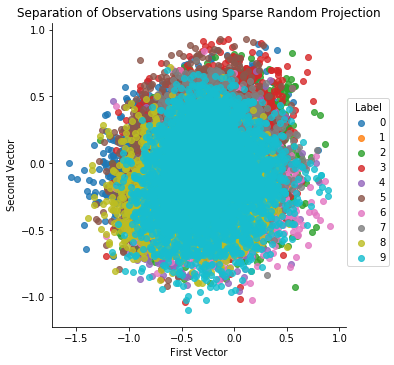

In [22]:
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, density=density, eps=eps, dense_output=dense_output, random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, 'Sparse Random Projection')

# Manifold 

## 1. Isomap

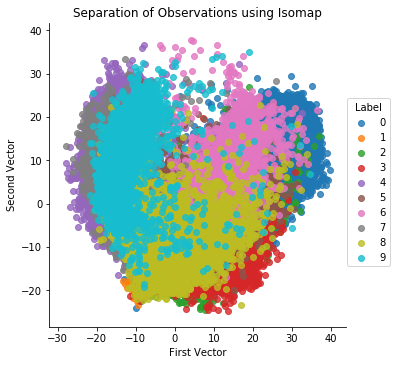

In [23]:
from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000, :])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, index=validation_index)

scatterPlot(X_train_isomap, y_train, 'Isomap')

## 2. Multidimensional Scaling

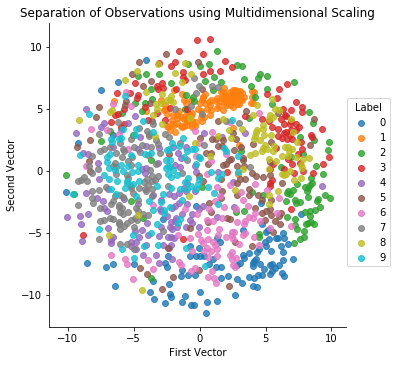

In [24]:
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000, :])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, 'Multidimensional Scaling')

## 3. Locally Linear Embedding

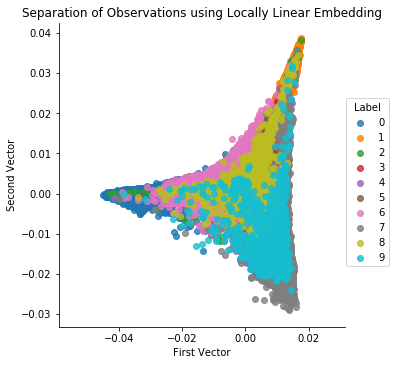

In [25]:
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, 
                             method=method, random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000, :])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, 'Locally Linear Embedding')

## 4. t-Distributed Stochastic Neighbor Embedding

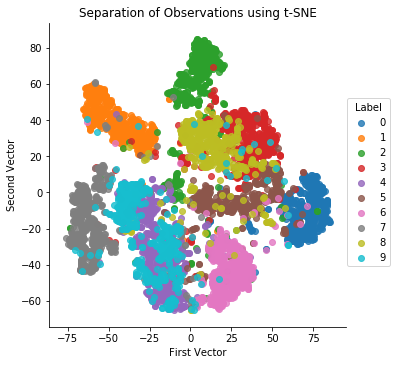

In [26]:
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, early_exaggeration=early_exaggeration,
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000, :9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, 't-SNE')


# Dictionary Learning

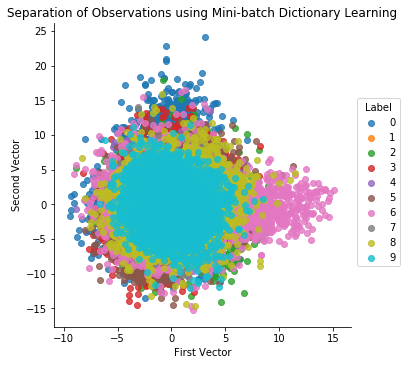

In [27]:
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size,
                                                    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:, :10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame(data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDoctLearning = pd.DataFrame(data=X_validation_miniBatchDictLearning, index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, 'Mini-batch Dictionary Learning')

# ICA

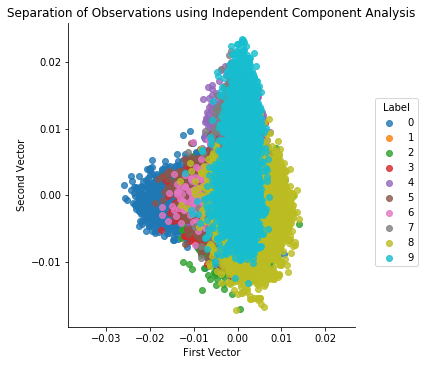

In [29]:
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA =pd.DataFrame(data=X_validation_fastICA, index=validation_index)

scatterPlot(X_train_fastICA, y_train, 'Independent Component Analysis')
